In [1]:
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.switch_backend('agg')
import seaborn as sns
sns.set_style( "white" )
sns.set(style="ticks")


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']  
plt.rcParams['pdf.fonttype'] = 42

In [2]:
%matplotlib inline

In [7]:
k=500
tools = ["BRIE2", "scQuint", "SpliZ", "MARVEL", "SCASL"] #,
result = []
for tool in tools:
    f = f'{tool}_AUCC.{k}.csv'
    df = pd.read_csv(f,index_col=0)
    for idx,row in df.iterrows():
        result.append([tool,idx,'rmats',row['rmats']])
        result.append([tool,idx,'leaf',row['leaf']])
result = pd.DataFrame(result,columns=['Tool','Dataset','Tool_bulk','AUCC'])
result.to_csv('AUCC_summary.{}.csv'.format(k),index=False)
result

,Tool,Dataset,Tool_bulk,AUCC
0,BRIE2,data2_24h,rmats,0.062196
1,BRIE2,data2_24h,leaf,0.040463
2,BRIE2,data2_48h,rmats,0.085780
3,BRIE2,data2_48h,leaf,0.053373
4,BRIE2,data2_72h,rmats,0.102100
5,BRIE2,data2_72h,leaf,0.069261
6,BRIE2,data8_ipsc,rmats,0.133054
7,BRIE2,data8_ipsc,leaf,0.060894
8,BRIE2,data9_a2i,rmats,0.130699
9,BRIE2,data9_a2i,leaf,0.059960


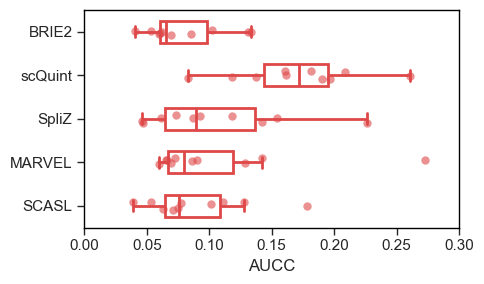

In [8]:
plt.figure(figsize=(5, 3))

linecolor = '#de4848'

ax = sns.boxplot(x='AUCC', y='Tool', data=result, 
                width=0.5, 
                fliersize=0,
                boxprops={'edgecolor': linecolor, 'facecolor': 'white', 'linewidth': 2},
                whiskerprops={'color': linecolor, 'linewidth': 2},
                medianprops={'color': linecolor, 'linewidth': 2},
                capprops={'color': linecolor, 'linewidth': 2})

sns.stripplot(x='AUCC', y='Tool', data=result,
             size=6, alpha=0.6,
             color=linecolor,
             dodge=True) 

plt.xlabel('AUCC')
plt.ylabel('')
plt.xlim(0, max(result['AUCC']) * 1.1)

for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

ax.tick_params(axis='both', which='both', direction='out', length=5, width=1)


plt.tight_layout()
plt.savefig('events_AUCC.{}.pdf'.format(k))
plt.show()
